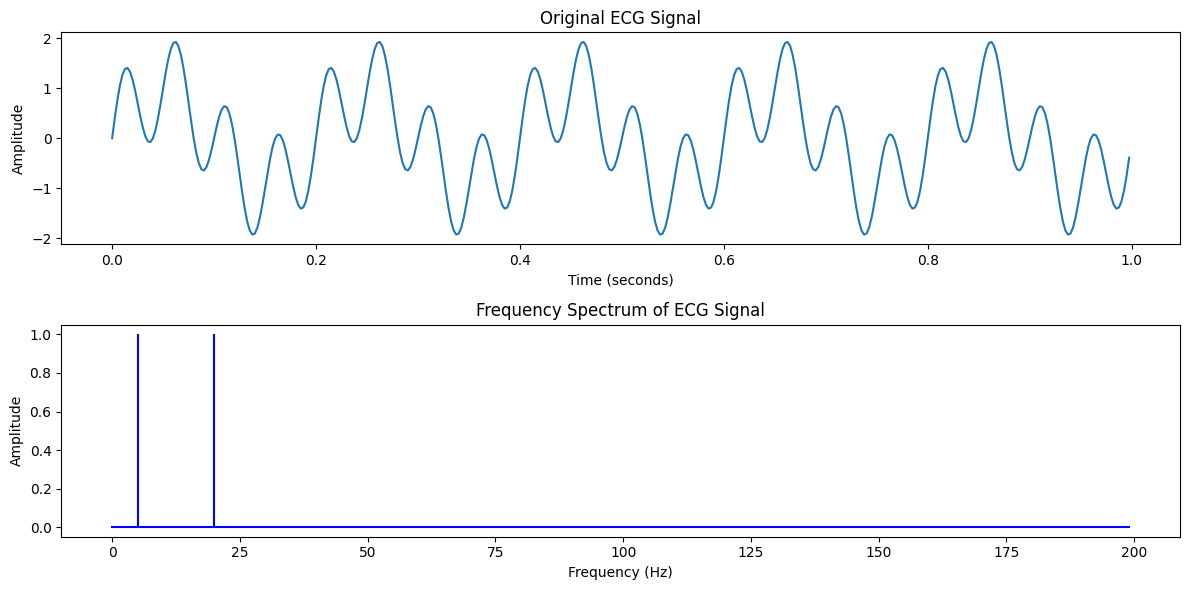

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating an ECG signal (for demonstration purposes, let's assume this is your ECG data)
# In a real-world scenario, you would replace this with actual ECG data.
t = np.linspace(0, 1, 400, endpoint=False)
ecg_signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 20 * t)  # A simple mix of 5Hz and 20Hz components

# Applying Fast Fourier Transform (FFT)
ecg_fft = np.fft.fft(ecg_signal)
frequency = np.fft.fftfreq(t.shape[-1], d=t[1] - t[0])

# Only plotting the positive half of the frequencies and normalizing the amplitude
n = ecg_signal.size
amplitude = np.abs(ecg_fft)[:n // 2] * (2 / n)
positive_freq = frequency[:n // 2]

# Plotting the original ECG signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, ecg_signal)
plt.title('Original ECG Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Plotting the Frequency Spectrum
plt.subplot(2, 1, 2)
plt.stem(positive_freq, amplitude, 'b', markerfmt=" ", basefmt="-b")
plt.title('Frequency Spectrum of ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


In [ ]:
# Computer vision: 3D data structure - point clouds and render them - segementation of diff kind of objects and reconstruct envoronment using point clouds and open3D - rmv noise artifacts outliers - mapping segmentation
# reconstruction - surface alignamnet - 3d visualization
# open 3d ml -
# point clouds (=collectoin of points that represents an object) -> 3d meshes & 3d models
# generate pc: 3d laser scanners -LiDAR
# 3D mesh (from point cloud): structural build or a structural base of a 3d model - mesh is a collection of vertices edges and faces that decides that 3d model height width and depth
# 3D model: 3d image : give whole info like texture color reflectivity light

! pip install open3D


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
! pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=31862bb3a2d5ae1b93acdbbd9a346230abd4ba9a4bac6b877009deed6bba3756
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import open3d as o3d
import numpy as np
import os
import sys


import wget
url = 'https://raw.githubusercontent.com/PointCloudLibrary/pcl/master/test/bunny.pcd'
#filename = wget.download(url)

pcd = o3d.io.read_point_cloud("bunny.pcd")
# pcd is point cloud data
print(pcd)

PointCloud with 397 points.


In [ ]:
#The code below writes a point cloud.

o3d.io.write_point_cloud("copy_of_bunny.pcd", pcd)

True

In [ ]:
pcd = o3d.io.read_point_cloud("sample.xyz", format='xyz')
print(pcd)

[Open3D WARNING] Read XYZ failed: unable to open file: sample.xyz
PointCloud with 0 points.


In [ ]:
# MESH: pls polygon file format
# The code below reads and writes a mesh.
print("Testing IO for meshes ...")

#Function to read TriangleMesh from file
mesh = o3d.io.read_triangle_mesh("knot.ply")
print(mesh)

Testing IO for meshes ...
TriangleMesh with 1440 points and 2880 triangles.


In [ ]:
import open3d as o3d
import numpy as np
import PIL.Image
import IPython.display
import os
import urllib
import tarfile
import gzip
import zipfile
import shutil

#Download the point cloud using below command
import wget
url = 'http://graphics.stanford.edu/pub/3Dscanrep/bunny.tar.gz'
#filename = wget.download(url)

In [ ]:
bunny_path = "bunny"
with tarfile.open(bunny_path + ".tar.gz") as tar:
            tar.extractall(path=os.path.dirname(bunny_path))

In [ ]:
bunny_path = "/content/bunny/reconstruction/bun_zipper.ply"
mesh = o3d.io.read_triangle_mesh(bunny_path)
mesh.compute_vertex_normals()

TriangleMesh with 35947 points and 69451 triangles.

In [ ]:
# Sample points uniformly from the mesh
pcd = mesh.sample_points_uniformly(number_of_points=500)
# Save the resulting mesh
o3d.io.write_triangle_mesh("sampled_mesh.ply", mesh)
o3d.io.write_point_cloud("sampled_point_cloud.pcd", pcd)

True

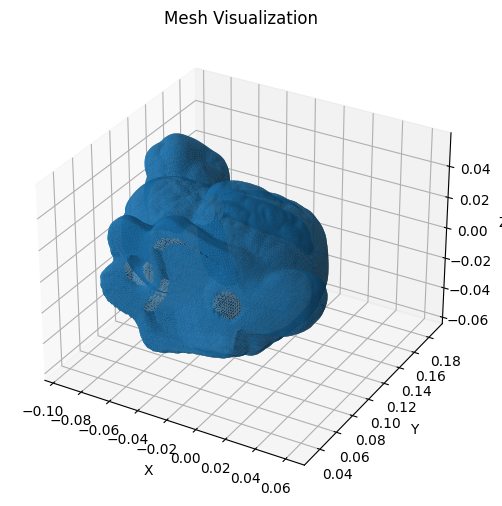

In [ ]:
import matplotlib.pyplot as plt
# Sample points uniformly from the mesh
pcd = mesh.sample_points_uniformly(number_of_points=500)
'''
# Visualize the mesh using matplotlib
if isinstance(pcd, o3d.geometry.PointCloud):
    points = np.asarray(pcd.points)
    plt.figure(figsize=(8, 6))
    plt.scatter(points[:, 0], points[:, 1], s=0.1)  # Adjust the marker size as needed
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Point Cloud Visualization")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
'''
# If you're working with a mesh
if isinstance(mesh, o3d.geometry.TriangleMesh):
    vertices = np.asarray(mesh.vertices)
    triangles = np.asarray(mesh.triangles)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=triangles)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("Mesh Visualization")
    plt.show()

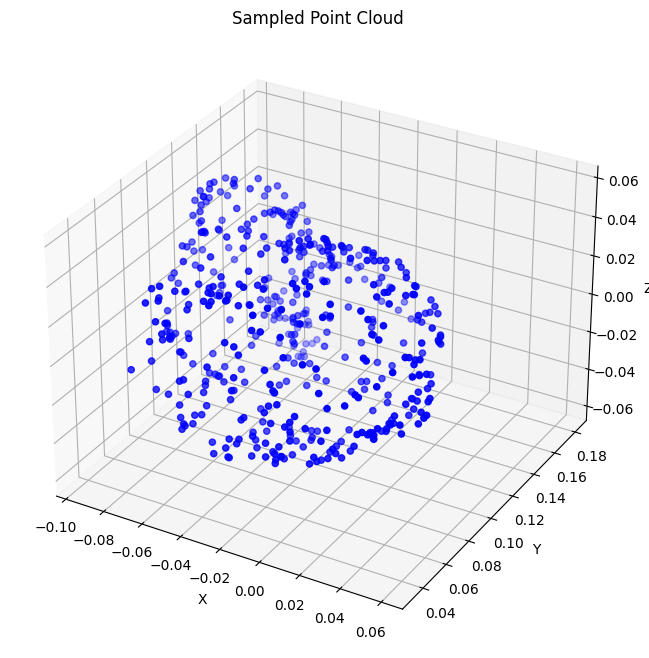

In [ ]:

# Visualize the sampled point cloud using matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates from the point cloud
points = np.asarray(pcd.points)

# Plot the point cloud
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')

# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sampled Point Cloud')

# Show plot
plt.show()

In [ ]:
#Download the Happy Buddha dataset
#Source: Stanford University Computer Graphics Laboratory

In [ ]:
#Download the Happy Buddha dataset
import wget
url = 'http://graphics.stanford.edu/pub/3Dscanrep/happy/happy_recon.tar.gz'
filename = wget.download(url)

In [ ]:
budha_path = "happy_recon"
with tarfile.open(budha_path + ".tar.gz") as tar:
            tar.extractall(path=os.path.dirname(budha_path))

budha_path = "/content/happy_recon/happy_vrip.ply"
mesh_budha = o3d.io.read_triangle_mesh(budha_path)
mesh_budha.compute_vertex_normals()

TriangleMesh with 543652 points and 1087716 triangles.

In [ ]:
# Sample points uniformly from the mesh
pcd_budha = mesh_budha.sample_points_uniformly(number_of_points=500)
# Save the resulting mesh
o3d.io.write_triangle_mesh("budha_mesh.ply", mesh_budha)


True

In [ ]:
import wget
url = 'http://graphics.stanford.edu/pub/3Dscanrep/dragon/dragon_recon.tar.gz'
filename = wget.download(url)
dragon_path = "dragon_recon"
with tarfile.open(dragon_path + ".tar.gz") as tar:
            tar.extractall(path=os.path.dirname(dragon_path))

dragon_path = "/content/dragon_recon/dragon_vrip.ply"
mesh_dragon = o3d.io.read_triangle_mesh(dragon_path)
mesh_dragon.compute_vertex_normals()

# Sample points uniformly from the mesh
pcd_dragon = mesh_dragon.sample_points_uniformly(number_of_points=500)
# Save the resulting mesh
o3d.io.write_triangle_mesh("mesh_dragon.ply", mesh_dragon)

True

In [ ]:
#Voxel downsampling
#1- It is a preprocessing step for point cloud processing tasks.
#2- It takes the point clouds and downsample.
#3- Points which are in 1 voxels are averaged and we get 1 point after averaging.
#Why downsampling? It makes the data of a more manageable size
#Reduces the dimensionality of the data thus enabling in faster processing of the data (image)
#Reducing the storage size of the data
print("Downsample the point cloud with a voxel of 0.05")
downpcd = pcd_dragon.voxel_down_sample(voxel_size=0.05)
o3d.visualization.draw_geometries([downpcd],width=1920, height=1080, left=50, top=50)


Downsample the point cloud with a voxel of 0.05
[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [ ]:
import numpy as np
print("Load a ply point cloud, print it, and render it")

#read_point_cloud reads a point cloud from a file. It tries to decode the file based on the extension name.
pcd = o3d.io.read_point_cloud("fragment.ply")
print(pcd)
print(np.asarray(pcd.points))

#draw_geometries visualizes the point cloud.
o3d.io.write_point_cloud("point_cloud.ply", pcd)



Load a ply point cloud, print it, and render it
PointCloud with 196133 points.
[[0.65234375 0.84686458 2.37890625]
 [0.65234375 0.83984375 2.38430572]
 [0.66737998 0.83984375 2.37890625]
 ...
 [2.00839925 2.39453125 1.88671875]
 [2.00390625 2.39488506 1.88671875]
 [2.00390625 2.39453125 1.88793314]]


True

In [6]:
!pip install trimesh
#triangle mesh - 3d - connect point clouds

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 690.8/690.8 kB 11.1 MB/s eta 0:00:00


In [7]:
import os
import glob
import trimesh
import tensorflow as tf
from  tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(1234)

#downloading the MODELNET 10 dataset #3d DL models
DATA_DIR = tf.keras.utils.get_file(
    "modelnet.zip",
    "http://3dvision.princeton.edu/projects/2014/3DShapeNets/ModelNet10.zip",
    extract=True,
)
DATA_DIR = os.path.join(os.path.dirname(DATA_DIR), "ModelNet10")

473402300/473402300 [==============================] - 14s 0us/step


In [8]:
mesh=trimesh.load(os.path.join(DATA_DIR,"chair/train/chair_0001.off"))
mesh.show()

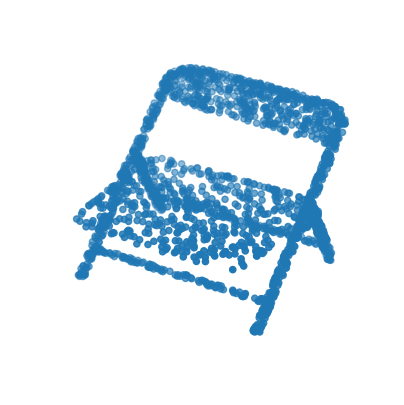

In [10]:
# convert a mesh file to a point cloud : sample points on the mesh surface
# .sample performs a uniform random sampling. sample at 2048 locations and visualize in matplotlib
import matplotlib.pyplot as plt

points=mesh.sample(2048)
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(points[:,0],points[:,1],points[:,2])
ax.set_axis_off()
plt.show()

In [11]:
def parse_dataset(num_points=2048):
  train_points=[]
  train_labels=[]
  test_points=[]
  test_labels=[]
  class_map={}
  folders=glob.glob(os.path.join(DATA_DIR,"[!README]*"))

  for i , folder in enumerate(folders):
    print ("processing class:{}".format(os.path.basename(folder)))
    # store the folder name with ID : can retrieve later
    class_map[i]=folder.split("/")[-1]
    #gather all files
    train_files=glob.glob(os.path.join(folder,"train/*"))
    test_files=glob.glob(os.path.join(folder,"test/*"))
    for f in train_files:
      train_points.append(trimesh.load(f).sample(num_points))
      train_labels.append(i)
    for f in test_files:
      test_points.append(trimesh.load(f).sample(num_points))
      test_labels.append(i)
  return(
      np.array(train_points),
      np.array(test_points),
      np.array(train_labels),
      np.array(test_labels),
      class_map,
  )

In [12]:
NUM_POINTS=2048
NUM_CLASSES=10
BATCH_SIZE=32
train_points,test_points,train_labels,test_labels,CLASS_MAP=parse_dataset(NUM_POINTS)

processing class:table
processing class:dresser
processing class:sofa
processing class:night_stand
processing class:chair
processing class:bed
processing class:bathtub
processing class:monitor
processing class:desk
processing class:toilet


In [60]:
import tensorflow as tf

def augment(points, label):
    points += tf.random.uniform(points.shape, -0.005, 0.005, dtype=tf.float64)
    points = tf.random.shuffle(points)  # Shuffle along the first axis (assuming points is a tensor)
    return points, label

train_dataset = tf.data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_points, test_labels))

# Shuffle and map the augment function for training dataset
train_dataset = train_dataset.shuffle(len(train_points)).map(augment).batch(BATCH_SIZE)

# Shuffle and map the augment function for test dataset
test_dataset = test_dataset.shuffle(len(test_points)).map(augment).batch(BATCH_SIZE)


In [55]:
def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)


def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)

In [73]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [80]:
import tensorflow as tf
from tensorflow import keras

class OrthogonalRegularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.eye))


In [81]:
def tnet(inputs, num_features):
    # Initialise bias as the identity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])

In [87]:
import keras
from tensorflow import data as tf_data
from tensorflow.keras import initializers, layers  # Make sure to import layers from tensorflow.keras
# Define your model
NUM_POINTS = 1000  # Example value, adjust as needed
NUM_CLASSES = 10  # Example value, adjust as needed


inputs = keras.Input(shape=(2048, 3))
x = tnet(inputs, 3)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()


Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_29 (InputLayer)       [(None, 2048, 3)]            0         []                            
                                                                                                  
 conv1d_22 (Conv1D)          (None, 2048, 32)             128       ['input_29[0][0]']            
                                                                                                  
 batch_normalization_95 (Ba  (None, 2048, 32)             128       ['conv1d_22[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_95 (Activation)  (None, 2048, 32)             0         ['batch_normalization_9

In [91]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=["sparse_categorical_accuracy"],)
model.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
125/125 [==============================] - 34s 164ms/step - loss: 2.6724 - sparse_categorical_accuracy: 0.4833 - val_loss: 1990066568251310080.0000 - val_sparse_categorical_accuracy: 0.3822
Epoch 2/10
125/125 [==============================] - 20s 159ms/step - loss: 2.5324 - sparse_categorical_accuracy: 0.5580 - val_loss: 749512796667904.0000 - val_sparse_categorical_accuracy: 0.5716
Epoch 3/10
125/125 [==============================] - 20s 158ms/step - loss: 2.3899 - sparse_categorical_accuracy: 0.5886 - val_loss: 6181005819904.0000 - val_sparse_categorical_accuracy: 0.6189
Epoch 4/10
125/125 [==============================] - 19s 152ms/step - loss: 2.2338 - sparse_categorical_accuracy: 0.6279 - val_loss: 315613792.0000 - val_sparse_categorical_accuracy: 0.6123
Epoch 5/10
125/125 [==============================] - 19s 156ms/step - loss: 2.2029 - sparse_categorical_accuracy: 0.6490 - val_loss: 2.8610 - val_sparse_categorical_accuracy: 0.5396
Epoch 6/10
125/125 [=============

1/1 [==============================] - 1s 768ms/step


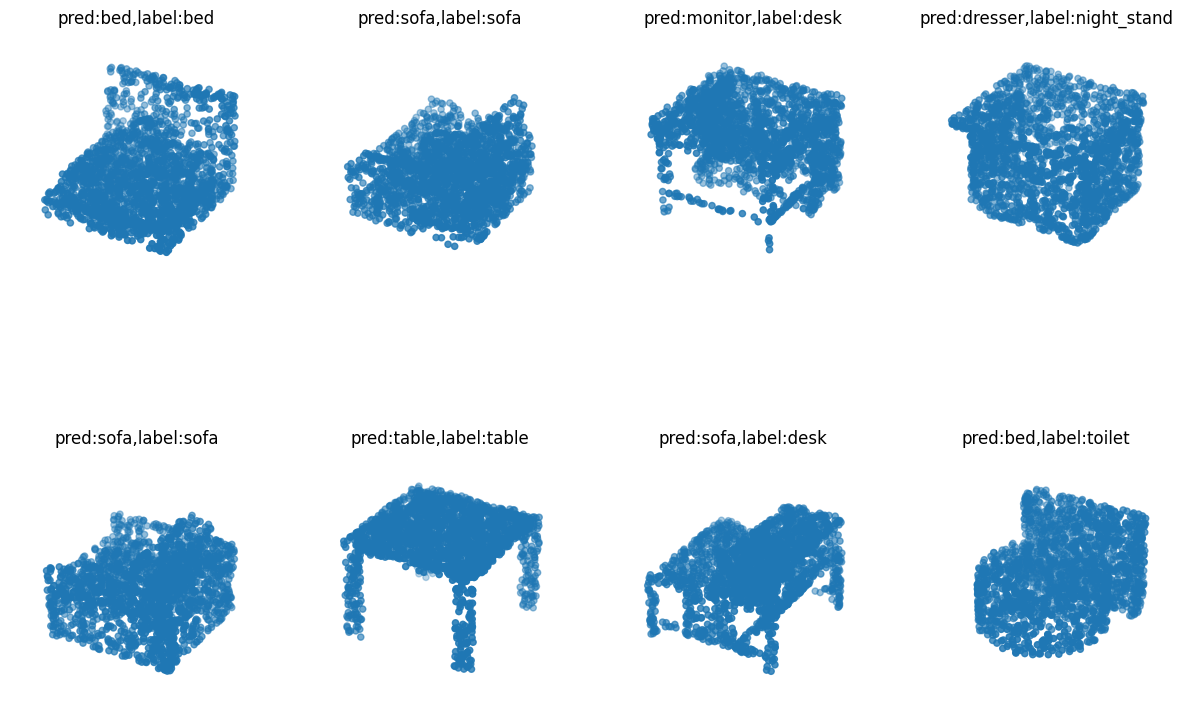

In [92]:
data=test_dataset.take(1)
points,labels=list(data)[0]
points=points[:8,...]
labels=labels[:8,...]
preds=model.predict(points)
preds=tf.math.argmax(preds,-1)
points=points.numpy()
fig=plt.figure(figsize=(15,10))
for i in range(8):
  ax=fig.add_subplot(2,4,i+1,projection="3d")
  ax.scatter(points[i,:,0],points[i,:,1],points[i,:,2])
  ax.set_title(
      "pred:{:},label:{:}".format(
          CLASS_MAP[preds[i].numpy()],CLASS_MAP[labels.numpy()[i]]
      )
  )
  ax.set_axis_off()
plt.show()